In [ ]:
import requests
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import time
import random
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
# taking the search input from the user
base_url = 'https://www.linkedin.com/jobs/search/?currentJobId=3568976147&geoId=103644278&keywords='

searchstring = input('enter the search string =>> ')
searchlist = searchstring.split()
i = 0

# adding the search input to the search string
while i < (len(searchlist)) :
  base_url = base_url + searchlist[i]
  if i == (len(searchlist) - 1):
    break
  base_url = base_url + '%20'
  i = i + 1

#final url before adding page number
base_url = base_url + '&location=United%20States&refresh=true'

print('Search string generated ==> ' , base_url)

enter the search string =>> data analyst
Search string generated ==>  https://www.linkedin.com/jobs/search/?currentJobId=3568976147&geoId=103644278&keywords=data%20analyst&location=United%20States&refresh=true


In [ ]:
#initializing the lists to store values
job_titles = []
job_companies = []
job_locations = []
job_links = []
job_postingtimes=[]

i = 0
total = 0

#taking user input about the number of pages
pagecounter = input('how many pages are needed =>> ')
pagecounter = int(pagecounter)

#iterating through pages
while i < pagecounter:
  print('page number =>',i)
  if i == 0:
    url = base_url
  else:
    start = i*25
    startstring = str(start)
    url = base_url + '&start=' + startstring
  req = Request(url , headers={'User-Agent': 'Chrome/70.0.3538.77'})
  page = urlopen(req).read()
  soup = BeautifulSoup(page, "html.parser")
  jobs = soup.find_all('div', class_='base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card')

  for job in jobs:
    job_title = job.find('h3', class_='base-search-card__title').text.strip()
    job_titles.append(job_title)
    job_company = job.find('h4', class_='base-search-card__subtitle').text.strip()
    job_companies.append(job_company)
    job_location = job.find('span', class_='job-search-card__location').text.strip()
    job_locations.append(job_location)
    job_link = job.find('a', class_='base-card__full-link')['href']
    job_links.append(job_link)

    try:
      job_postingtime=job.find('time', class_=re.compile('^job-search-card__listdate')).text.strip()
    except:
      job_postingtime='N/A'
    job_postingtimes.append(job_postingtime)

  i = i + 1
#adding a delay between scraping
  if i < 30:
    buffer = 15
  elif i < 65:
    buffer = 25
  else:
    buffer = 60
  #wait = buffer + 1.02**i + random.randint(1,15) + random.randint(1,5)
  wait = buffer + random.randint(1,5)
  print('paused for ',round(wait,1),' seconds')
  total = total + wait
  time.sleep(wait)

#Summary of the scrap completed
print('------------------------------')
print('total entries retrieved',len(job_titles))
print('time taken ',round((total/60),1),' minutes')

how many pages are needed =>> 5
page number => 0
paused for  17  seconds
page number => 1
paused for  18  seconds
page number => 2
paused for  16  seconds
page number => 3
paused for  18  seconds
page number => 4
paused for  19  seconds
------------------------------
total entries retrieved 122
time taken  1.5  minutes


In [ ]:
job_levels=[]
job_types=[]
job_functions=[]
job_industries=[]
error_headers_list = []
error_link_list = []
count = 0
errros = 0
total = 0
for job in job_links:
  #counting time for call
  wait = 0
  #time.sleep(wait)
  total = total + wait

  #varying user agent and webscraping
  newurl=job
  user_agent_list = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36',
    'Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.3 Mobile/15E148 Safari/604.1',
    'Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)',
    ]

  headers={"User-Agent": user_agent_list[random.randint(0, len(user_agent_list)-1)]}
  newreq=Request(newurl , headers=headers)
  try:
    newpage = urlopen(newreq).read()
    newsoup = BeautifulSoup(newpage, "html.parser")
    job_detail=newsoup.find_all('span',class_='description__job-criteria-text description__job-criteria-text--criteria')
    try:
      job_level=job_detail[0].text.strip()
    except:
      job_level='N/A'
    job_levels.append(job_level)

    try:
      job_type=job_detail[1].text.strip()
    except:
      job_type='N/A'
    job_types.append(job_type)

    try:
      job_function=job_detail[2].text.strip()
    except:
      job_function='Not Defined'
    job_functions.append(job_function)

    try:
      job_industry=job_detail[3].text.strip()
    except:
      job_industry='N/A'
    job_industries.append(job_industry)
    #end
  except:
    #error reporting and handling
    print('error detected in link')
    errros = errros + 1
    error_link = newurl
    error_headers = headers
    error_headers_list.append(error_headers)
    error_link_list.append(newurl)
    #adding NA values where link fails
    job_level='N/A'
    job_type='N/A'
    job_function='N/A'
    job_industry='N/A'
    job_levels.append(job_level)
    job_types.append(job_type)
    job_functions.append(job_function)
    job_industries.append(job_industry)

  count=count+1
  #Summary of the scrap completed
print('------------------------------')
print(f'total entries retrieved {count}',f'of which we have {errros} errors')
print('time taken ',round((total/60),1),' minutes')

error detected in link
error detected in link
error detected in link
error detected in link
error detected in link
------------------------------
total entries retrieved 122 of which we have 5 errors
time taken  0.0  minutes


In [ ]:
print(error_headers_list)
print(error_link_list)

[{'User-Agent': 'Mozilla/5.0 (X11; Linux ppc64le; rv:75.0) Gecko/20100101 Firefox/75.0'}, {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko/20100101  Firefox/28.0'}, {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:61.0) Gecko/20100101 Firefox/73.0'}, {'User-Agent': 'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.10; rv:75.0) Gecko/20100101 Firefox/75.0'}, {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Firefox/58.0.1'}]
['https://www.linkedin.com/jobs/view/data-analyst-at-resource-innovations-3594051421?refId=Xw7SuDGhP859vnYrdx5AQA%3D%3D&trackingId=oLanSwpyklwXhqjkAGGl%2FQ%3D%3D&position=17&pageNum=0&trk=public_jobs_jserp-result_search-card', 'https://www.linkedin.com/jobs/view/senior-data-analyst-at-prealize-health-3590173492?refId=Xw7SuDGhP859vnYrdx5AQA%3D%3D&trackingId=VxQn2%2B485Dm1EgWPVNL0eQ%3D%3D&position=19&pageNum=0&trk=public_jobs_jserp-result_search-card', 'https://www.linkedin.com/jobs/view/junior-d

In [ ]:
# creating a data frame and storing values there:
df = pd.DataFrame({'Job title': job_titles,
                       'Company name': job_companies,
                       'Location': job_locations,
                       'Posted on':job_postingtimes,
                       'Job level':job_levels,
                       'Job Type' : job_types,
                       'Job Function': job_functions,
                       'Industry' :job_industries
})
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job title     122 non-null    object
 1   Company name  122 non-null    object
 2   Location      122 non-null    object
 3   Posted on     122 non-null    object
 4   Job level     122 non-null    object
 5   Job Type      122 non-null    object
 6   Job Function  122 non-null    object
 7   Industry      122 non-null    object
dtypes: object(8)
memory usage: 7.8+ KB
None


,Job title,Company name,Location,Posted on,Job level,Job Type,Job Function,Industry
0,Data Analyst,Good Apple,New York City Metropolitan Area,1 week ago,Associate,Full-time,"Strategy/Planning, Advertising, and Marketing",Advertising Services
1,Data Analyst,FrankCrum,"Clearwater, FL",2 weeks ago,Mid-Senior level,Full-time,Information Technology,Internet Publishing
2,Fraud Data Analyst,PlayStation,"San Mateo, CA",1 week ago,Not Applicable,Full-time,Information Technology,"Software Development, Consumer Services, and E..."
3,Data Analyst,BlueTeam,"Boca Raton, FL",2 weeks ago,Mid-Senior level,Full-time,Information Technology,Internet Publishing
4,Data Analyst,Pulivarthi Group (PG),United States,1 week ago,Entry level,Full-time,Information Technology,IT Services and IT Consulting
...,...,...,...,...,...,...,...,...
117,Junior Data Analyst (Remote),SynergisticIT,"Los Angeles, CA",2 weeks ago,Entry level,Full-time,Information Technology,IT Services and IT Consulting
118,Data/Email Analyst,Likemind,United States,2 weeks ago,Not Applicable,Full-time,Information Technology,"Transportation, Logistics, Supply Chain and St..."
119,Data Analyst,PCI Government Services LLC,"Washington, DC",6 days ago,Not Applicable,Full-time,"Information Technology, Administrative, and Co...",Government Relations Services and Business Con...
120,Data Analyst,Indotronix Avani Group,"Houston, TX",1 week ago,Mid-Senior level,Contract,Information Technology,Oil and Gas


In [ ]:
#save to csv file
df.to_csv('Jobs.csv', index=False)

## **Data** **Cleaning**

In [ ]:
#reading the csv file
se = pd.read_csv('/content/Jobs.csv')

In [ ]:
#Cleaning the data
#1. Splitting State and City
se[['City', 'State']] = se['Location'].str.split(',', expand=True)

#2. Dropping 'Posted on and Location Column'
se.drop(columns=["Posted on", "Location"])

#3. dropping rows with null state and City values
se.drop(se[se['State'] == ' United States'].index, inplace = True)
se.drop(se[se['City'] == 'United States'].index, inplace = True)


#4. drop all rows in which there is any missing values
se_clean=se.dropna()

print('done')

done


In [ ]:
se_clean.head(10)

,Job title,Company name,Location,Posted on,Job level,Job Type,Job Function,Industry,City,State
1,Data Analyst,FrankCrum,"Clearwater, FL",2 weeks ago,Mid-Senior level,Full-time,Information Technology,Internet Publishing,Clearwater,FL
2,Fraud Data Analyst,PlayStation,"San Mateo, CA",1 week ago,Not Applicable,Full-time,Information Technology,"Software Development, Consumer Services, and E...",San Mateo,CA
3,Data Analyst,BlueTeam,"Boca Raton, FL",2 weeks ago,Mid-Senior level,Full-time,Information Technology,Internet Publishing,Boca Raton,FL
5,Data Analyst,Freelance Recruiters,"Franklin, TN",1 week ago,Associate,Full-time,Analyst,"Technology, Information and Internet",Franklin,TN
6,MySQL Data Analyst,Dorsia,"New York, NY",2 weeks ago,Not Applicable,Full-time,Information Technology,"Transportation, Logistics, Supply Chain and St...",New York,NY
7,Data Analyst,Lockheed Martin,"Lexington, KY",1 week ago,Entry level,Full-time,Information Technology,Defense and Space Manufacturing,Lexington,KY
9,Data Analyst,Adams Electric Company,"Miami, FL",6 days ago,Mid-Senior level,Full-time,Analyst,"Technology, Information and Internet",Miami,FL
10,Data Analyst,H&S Family of Bakeries,"Baltimore, MD",1 week ago,Entry level,Full-time,Information Technology,Food Production,Baltimore,MD
11,Item Data Analyst,Noble,"Boston, MA",2 weeks ago,Entry level,Full-time,Supply Chain,"Technology, Information and Internet",Boston,MA
12,Data Analyst,Kikoff,"San Francisco, CA",2 weeks ago,Not Applicable,Full-time,Information Technology,"Transportation, Logistics, Supply Chain and St...",San Francisco,CA


## Q1 what is the best state for a particular Job ?


In [ ]:
#What are the most common locations for data scientist jobs on the job board?
State_counts = se_clean['State'].value_counts()

In [ ]:
# Create a bar plot to visualize the top locations(1)
top_locations = State_counts.head(20)

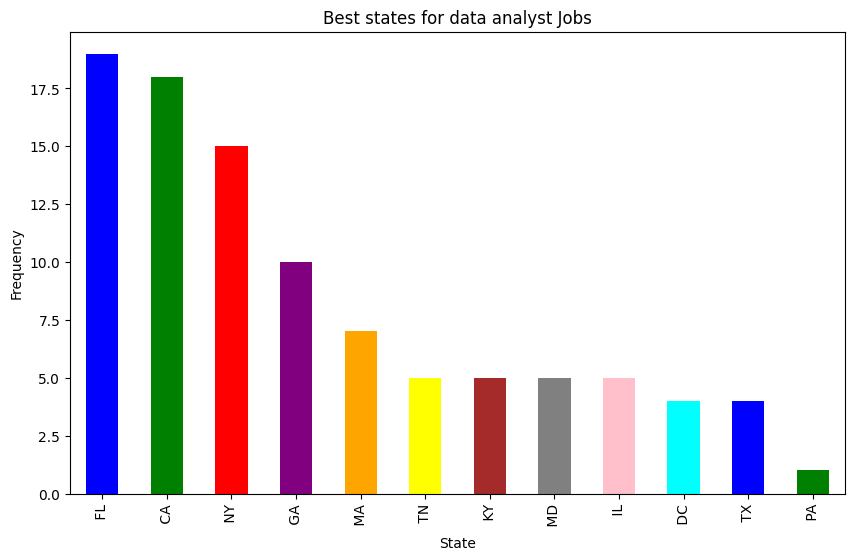

In [ ]:
# Define a custom color palette(1)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'gray', 'pink', 'cyan']

plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color=colors)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Best states for '+searchstring+ ' Jobs')
plt.show()

## Q2 what is the most common job level companies are recruiting ?


In [ ]:
# Count the occurrences of each job level
job_level_counts = se_clean['Job level'].value_counts()

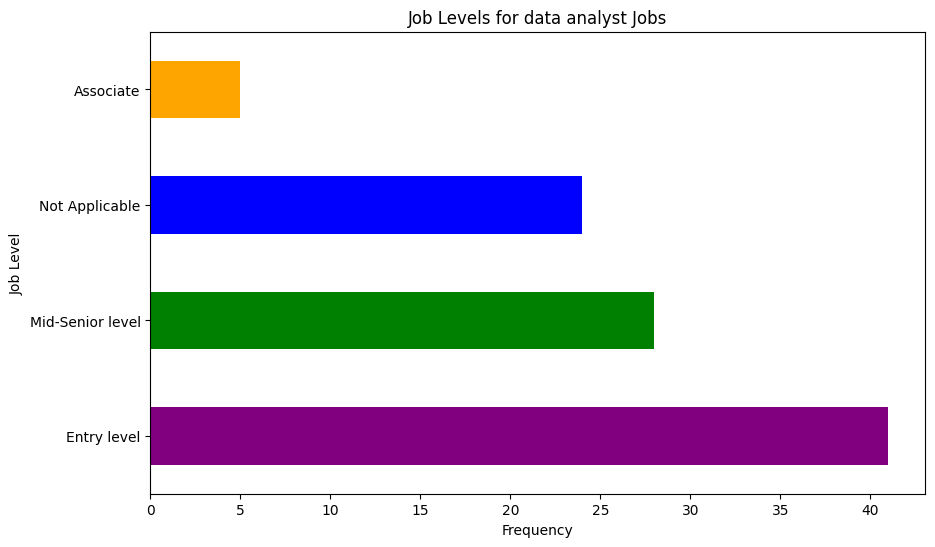

In [ ]:
# Define a custom color palette
colors = ['purple', 'green', 'blue', 'orange', 'red', 'cyan', 'yellow', 'gray', 'pink', 'brown']

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
job_level_counts.plot(kind='barh', color=colors)
plt.xlabel('Frequency')
plt.ylabel('Job Level')
plt.title('Job Levels for '+searchstring+' Jobs')
plt.show()

## Q3 what is the job level spread for different states ?



In [ ]:
# Select the relevant columns for analysis
se_selected = se_clean[['Job level', 'State', 'Industry']]

In [ ]:
# Group the data by 'Job Level' and 'Job Function' or 'Industry', and count the occurrences
#grouped_counts = se_selected.groupby(['Job level ', 'State']).size().unstack(fill_value=0)
# OR
grouped_counts = se_selected.groupby(['State','Job level']).size().unstack(fill_value=0)



<Figure size 20000x2000 with 0 Axes>

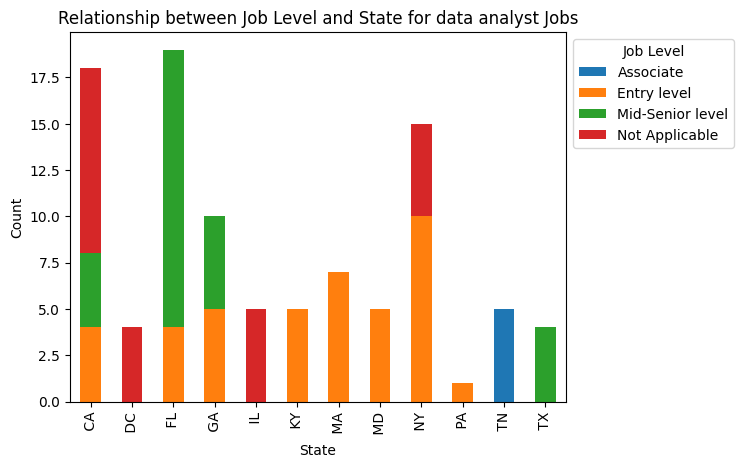

In [ ]:
# Plot the stacked bar chart
plt.figure(figsize=(200, 20))
grouped_counts.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Relationship between Job Level and State for '+searchstring+ ' Jobs')
plt.legend(title='Job Level', bbox_to_anchor=(1, 1))
# OR
# plt.legend(title='Industry', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

## Q4 Which are the industries hiring for this particular role ?



In [ ]:
# Count the occurrences of each industry
industry_counts = se_clean['Industry'].value_counts()


In [ ]:
# Get the top 10 most common industries
top_industries = industry_counts.head(10)

Text(0, 0.5, '')

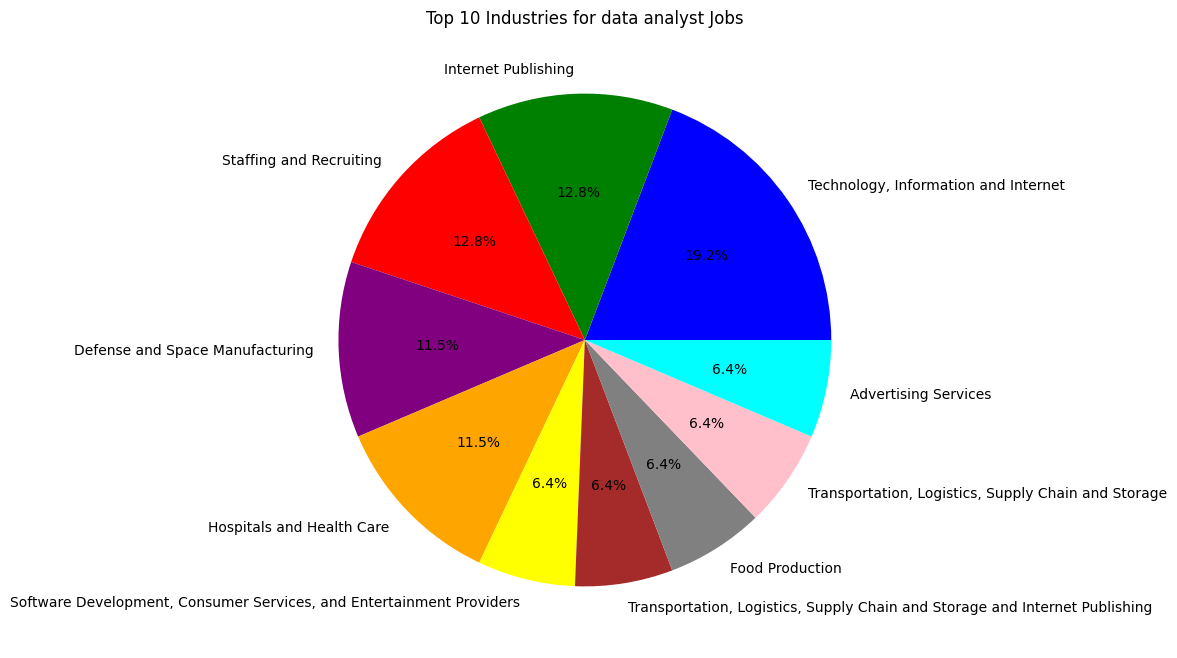

In [ ]:
# Define a custom color palette
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'gray', 'pink', 'cyan']

# Define a custom color palette
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'gray', 'pink', 'cyan']

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
top_industries.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Top 10 Industries for '+searchstring+' Jobs')
plt.ylabel('')



## Q5 Among the industries hiring what is the job level spread ?

In [ ]:
# Select the relevant columns for analysis
se_selected = se_clean[['Job level', 'State', 'Industry']]

In [ ]:
# Group the data by 'Job Level' and 'Job Function' or 'Industry', and count the occurrences
#grouped_counts = se_selected.groupby(['Job level ', 'State']).size().unstack(fill_value=0)
# OR
grouped_counts = se_selected.groupby([ 'Industry','Job level']).size().unstack(fill_value=0)

<Figure size 20000x2000 with 0 Axes>

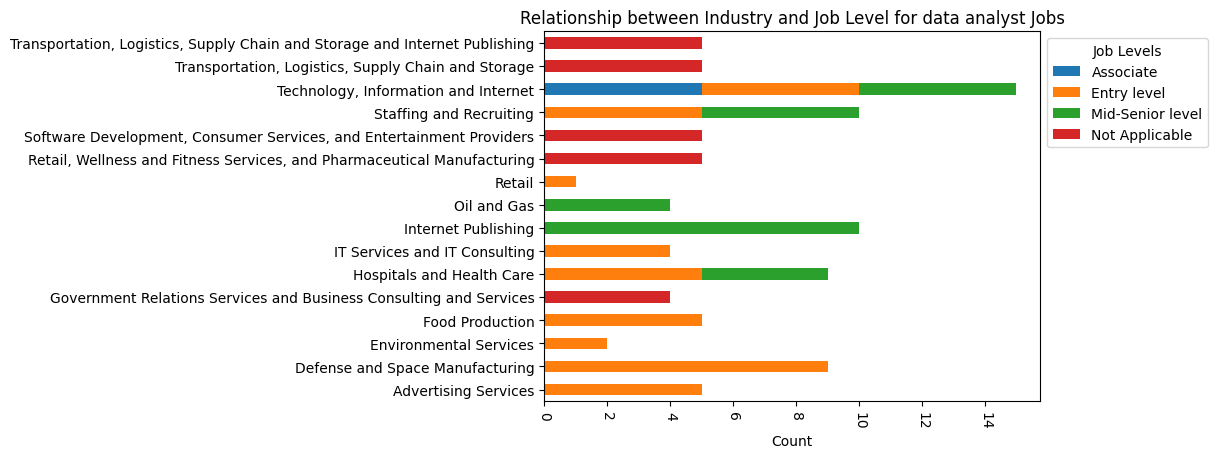

In [ ]:
# Plot the stacked bar chart
plt.figure(figsize=(200, 20))
grouped_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('')
plt.title('Relationship between Industry and Job Level for '+searchstring+ ' Jobs')
plt.legend(title='Job Levels', bbox_to_anchor=(1, 1))
# OR
# plt.legend(title='Industry', bbox_to_anchor=(1, 1))
plt.xticks(rotation=-90)
plt.show()

## Q6 which job fuctions are associated with a particular level ?


In [ ]:
grouped_counts = se_clean.groupby(['Job level','Job Function']).size().unstack(fill_value=0)

<Axes: xlabel='Job Function'>

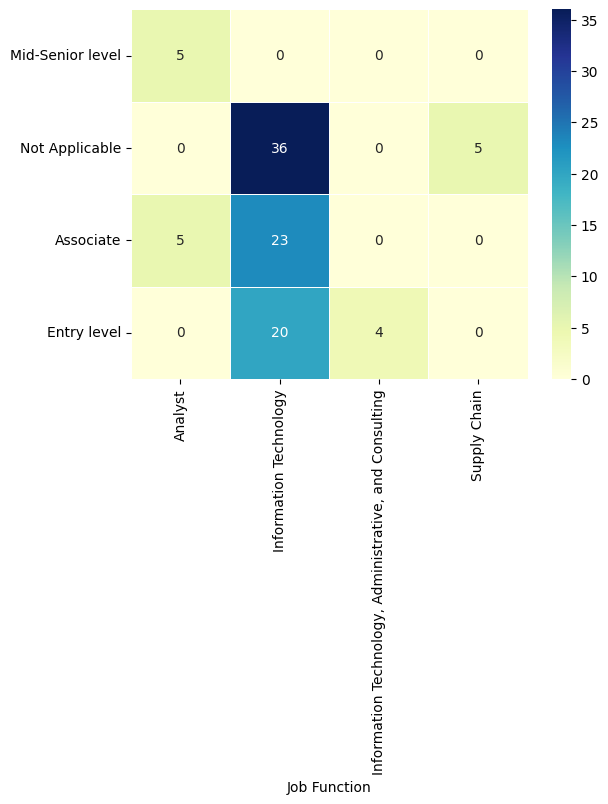

In [ ]:
import numpy as np
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Cols= grouped_counts.columns
Index = se_clean['Job level'].unique()
df = DataFrame(grouped_counts.head(20).to_numpy(), index= Index, columns= Cols)

sns.heatmap(df, cmap='YlGnBu', linewidths=0.5, annot=True)